# GAN Training

## imports

In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
import numpy as np
dat = np.load('./data/full-numpy_bitmap-camel.npy')
dat.shape # (121399,784)

dat = (dat.astype('float32') - 127.5) / 127.5

dat = dat.reshape(dat.shape[0],28,28,1)

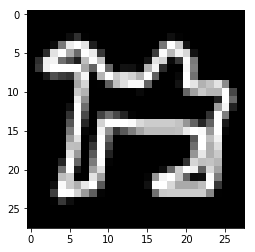

In [4]:
plt.imshow(dat[200,:,:,0], cmap = 'gray')

## architecture

In [5]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

# if mode == 'build':
#     gan.save(RUN_FOLDER)
# else:
#     gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W1108 02:07:04.445024 140550088849216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1108 02:07:04.503437 140550088849216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W1108 02:07:04.535418 140550088849216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1108 02:07:04.545155 140550088849216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133:

In [6]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [7]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       204928    
__________

## training

In [8]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 1000

In [9]:
%%time
gan.train(     
    dat
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.831)(R 0.696, F 0.966)] [D acc: (0.180)(0.359, 0.000)] [G loss: 0.667] [G acc: 1.000]


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (1.125)(R 0.646, F 1.603)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.695] [G acc: 0.328]
2 [D loss: (0.695)(R 0.692, F 0.699)] [D acc: (0.297)(0.562, 0.031)] [G loss: 0.692] [G acc: 0.672]
3 [D loss: (0.696)(R 0.690, F 0.703)] [D acc: (0.352)(0.688, 0.016)] [G loss: 0.690] [G acc: 0.859]
4 [D loss: (0.695)(R 0.689, F 0.700)] [D acc: (0.398)(0.766, 0.031)] [G loss: 0.689] [G acc: 0.891]
5 [D loss: (0.694)(R 0.687, F 0.702)] [D acc: (0.484)(0.969, 0.000)] [G loss: 0.688] [G acc: 0.906]
6 [D loss: (0.695)(R 0.687, F 0.702)] [D acc: (0.461)(0.922, 0.000)] [G loss: 0.688] [G acc: 0.938]
7 [D loss: (0.695)(R 0.686, F 0.703)] [D acc: (0.492)(0.984, 0.000)] [G loss: 0.689] [G acc: 0.984]
8 [D loss: (0.695)(R 0.686, F 0.704)] [D acc: (0.492)(0.969, 0.016)] [G loss: 0.688] [G acc: 0.953]
9 [D loss: (0.695)(R 0.685, F 0.704)] [D acc: (0.477)(0.953, 0.000)] [G loss: 0.689] [G acc: 0.938]
10 [D loss: (0.696)(R 0.685, F 0.707)] [D acc: (0.492)(0.984, 0.000)] [G loss: 0.690] [G acc: 0.922]

83 [D loss: (0.699)(R 0.673, F 0.725)] [D acc: (0.414)(0.672, 0.156)] [G loss: 0.699] [G acc: 0.422]
84 [D loss: (0.691)(R 0.664, F 0.718)] [D acc: (0.547)(0.797, 0.297)] [G loss: 0.693] [G acc: 0.406]
85 [D loss: (0.696)(R 0.647, F 0.744)] [D acc: (0.508)(0.891, 0.125)] [G loss: 0.707] [G acc: 0.250]
86 [D loss: (0.700)(R 0.665, F 0.735)] [D acc: (0.438)(0.734, 0.141)] [G loss: 0.695] [G acc: 0.422]
87 [D loss: (0.699)(R 0.669, F 0.730)] [D acc: (0.414)(0.719, 0.109)] [G loss: 0.694] [G acc: 0.531]
88 [D loss: (0.696)(R 0.668, F 0.725)] [D acc: (0.516)(0.828, 0.203)] [G loss: 0.694] [G acc: 0.453]
89 [D loss: (0.696)(R 0.674, F 0.718)] [D acc: (0.500)(0.750, 0.250)] [G loss: 0.699] [G acc: 0.375]
90 [D loss: (0.700)(R 0.675, F 0.725)] [D acc: (0.406)(0.688, 0.125)] [G loss: 0.696] [G acc: 0.359]
91 [D loss: (0.690)(R 0.670, F 0.710)] [D acc: (0.555)(0.812, 0.297)] [G loss: 0.702] [G acc: 0.375]
92 [D loss: (0.686)(R 0.679, F 0.693)] [D acc: (0.617)(0.703, 0.531)] [G loss: 0.701] [G ac

164 [D loss: (0.695)(R 0.642, F 0.748)] [D acc: (0.461)(0.703, 0.219)] [G loss: 0.694] [G acc: 0.469]
165 [D loss: (0.730)(R 0.634, F 0.825)] [D acc: (0.383)(0.734, 0.031)] [G loss: 0.690] [G acc: 0.469]
166 [D loss: (0.702)(R 0.656, F 0.747)] [D acc: (0.516)(0.734, 0.297)] [G loss: 0.692] [G acc: 0.500]
167 [D loss: (0.692)(R 0.651, F 0.734)] [D acc: (0.508)(0.734, 0.281)] [G loss: 0.698] [G acc: 0.406]
168 [D loss: (0.695)(R 0.647, F 0.744)] [D acc: (0.492)(0.734, 0.250)] [G loss: 0.694] [G acc: 0.453]
169 [D loss: (0.718)(R 0.649, F 0.787)] [D acc: (0.406)(0.688, 0.125)] [G loss: 0.714] [G acc: 0.359]
170 [D loss: (0.700)(R 0.657, F 0.742)] [D acc: (0.500)(0.703, 0.297)] [G loss: 0.711] [G acc: 0.406]
171 [D loss: (0.688)(R 0.648, F 0.727)] [D acc: (0.523)(0.750, 0.297)] [G loss: 0.715] [G acc: 0.297]
172 [D loss: (0.691)(R 0.634, F 0.747)] [D acc: (0.523)(0.750, 0.297)] [G loss: 0.706] [G acc: 0.391]
173 [D loss: (0.701)(R 0.639, F 0.762)] [D acc: (0.453)(0.734, 0.172)] [G loss: 0.

245 [D loss: (0.718)(R 0.625, F 0.811)] [D acc: (0.453)(0.719, 0.188)] [G loss: 0.709] [G acc: 0.375]
246 [D loss: (0.693)(R 0.609, F 0.776)] [D acc: (0.547)(0.844, 0.250)] [G loss: 0.729] [G acc: 0.359]
247 [D loss: (0.676)(R 0.618, F 0.733)] [D acc: (0.555)(0.734, 0.375)] [G loss: 0.722] [G acc: 0.344]
248 [D loss: (0.699)(R 0.595, F 0.803)] [D acc: (0.523)(0.766, 0.281)] [G loss: 0.747] [G acc: 0.328]
249 [D loss: (0.716)(R 0.614, F 0.817)] [D acc: (0.484)(0.672, 0.297)] [G loss: 0.770] [G acc: 0.281]
250 [D loss: (0.679)(R 0.629, F 0.728)] [D acc: (0.539)(0.672, 0.406)] [G loss: 0.769] [G acc: 0.266]
251 [D loss: (0.706)(R 0.628, F 0.783)] [D acc: (0.469)(0.656, 0.281)] [G loss: 0.782] [G acc: 0.188]
252 [D loss: (0.681)(R 0.600, F 0.762)] [D acc: (0.539)(0.734, 0.344)] [G loss: 0.787] [G acc: 0.234]
253 [D loss: (0.707)(R 0.666, F 0.748)] [D acc: (0.398)(0.516, 0.281)] [G loss: 0.747] [G acc: 0.312]
254 [D loss: (0.696)(R 0.614, F 0.778)] [D acc: (0.492)(0.641, 0.344)] [G loss: 0.

326 [D loss: (0.710)(R 0.615, F 0.804)] [D acc: (0.500)(0.641, 0.359)] [G loss: 0.813] [G acc: 0.219]
327 [D loss: (0.685)(R 0.664, F 0.706)] [D acc: (0.523)(0.500, 0.547)] [G loss: 0.858] [G acc: 0.172]
328 [D loss: (0.681)(R 0.676, F 0.686)] [D acc: (0.625)(0.562, 0.688)] [G loss: 0.796] [G acc: 0.234]
329 [D loss: (0.691)(R 0.613, F 0.770)] [D acc: (0.539)(0.719, 0.359)] [G loss: 0.812] [G acc: 0.188]
330 [D loss: (0.666)(R 0.639, F 0.693)] [D acc: (0.578)(0.578, 0.578)] [G loss: 0.847] [G acc: 0.125]
331 [D loss: (0.698)(R 0.664, F 0.731)] [D acc: (0.539)(0.562, 0.516)] [G loss: 0.818] [G acc: 0.203]
332 [D loss: (0.685)(R 0.626, F 0.744)] [D acc: (0.586)(0.734, 0.438)] [G loss: 0.827] [G acc: 0.203]
333 [D loss: (0.665)(R 0.639, F 0.690)] [D acc: (0.648)(0.641, 0.656)] [G loss: 0.837] [G acc: 0.188]
334 [D loss: (0.687)(R 0.643, F 0.732)] [D acc: (0.539)(0.562, 0.516)] [G loss: 0.826] [G acc: 0.141]
335 [D loss: (0.675)(R 0.580, F 0.769)] [D acc: (0.602)(0.750, 0.453)] [G loss: 0.

407 [D loss: (0.681)(R 0.668, F 0.694)] [D acc: (0.570)(0.547, 0.594)] [G loss: 0.979] [G acc: 0.078]
408 [D loss: (0.664)(R 0.668, F 0.659)] [D acc: (0.648)(0.578, 0.719)] [G loss: 0.959] [G acc: 0.125]
409 [D loss: (0.715)(R 0.612, F 0.819)] [D acc: (0.547)(0.641, 0.453)] [G loss: 0.958] [G acc: 0.094]
410 [D loss: (0.651)(R 0.594, F 0.708)] [D acc: (0.641)(0.703, 0.578)] [G loss: 0.951] [G acc: 0.156]
411 [D loss: (0.672)(R 0.642, F 0.702)] [D acc: (0.617)(0.641, 0.594)] [G loss: 0.990] [G acc: 0.078]
412 [D loss: (0.683)(R 0.677, F 0.688)] [D acc: (0.539)(0.531, 0.547)] [G loss: 0.949] [G acc: 0.125]
413 [D loss: (0.647)(R 0.581, F 0.714)] [D acc: (0.594)(0.625, 0.562)] [G loss: 0.931] [G acc: 0.172]
414 [D loss: (0.704)(R 0.635, F 0.773)] [D acc: (0.531)(0.594, 0.469)] [G loss: 0.950] [G acc: 0.188]
415 [D loss: (0.651)(R 0.628, F 0.674)] [D acc: (0.633)(0.625, 0.641)] [G loss: 0.939] [G acc: 0.125]
416 [D loss: (0.684)(R 0.576, F 0.792)] [D acc: (0.609)(0.656, 0.562)] [G loss: 0.

488 [D loss: (0.660)(R 0.724, F 0.597)] [D acc: (0.594)(0.500, 0.688)] [G loss: 1.098] [G acc: 0.109]
489 [D loss: (0.676)(R 0.626, F 0.726)] [D acc: (0.562)(0.609, 0.516)] [G loss: 1.024] [G acc: 0.172]
490 [D loss: (0.686)(R 0.669, F 0.702)] [D acc: (0.531)(0.547, 0.516)] [G loss: 1.011] [G acc: 0.156]
491 [D loss: (0.741)(R 0.643, F 0.840)] [D acc: (0.523)(0.562, 0.484)] [G loss: 1.131] [G acc: 0.078]
492 [D loss: (0.671)(R 0.634, F 0.707)] [D acc: (0.594)(0.578, 0.609)] [G loss: 1.109] [G acc: 0.031]
493 [D loss: (0.690)(R 0.685, F 0.695)] [D acc: (0.602)(0.562, 0.641)] [G loss: 1.067] [G acc: 0.109]
494 [D loss: (0.654)(R 0.621, F 0.686)] [D acc: (0.609)(0.594, 0.625)] [G loss: 1.062] [G acc: 0.125]
495 [D loss: (0.702)(R 0.650, F 0.754)] [D acc: (0.570)(0.625, 0.516)] [G loss: 1.071] [G acc: 0.109]
496 [D loss: (0.659)(R 0.660, F 0.659)] [D acc: (0.617)(0.594, 0.641)] [G loss: 1.005] [G acc: 0.109]
497 [D loss: (0.679)(R 0.686, F 0.672)] [D acc: (0.570)(0.531, 0.609)] [G loss: 0.

569 [D loss: (0.716)(R 0.577, F 0.854)] [D acc: (0.570)(0.656, 0.484)] [G loss: 1.042] [G acc: 0.234]
570 [D loss: (0.582)(R 0.521, F 0.644)] [D acc: (0.664)(0.719, 0.609)] [G loss: 1.110] [G acc: 0.203]
571 [D loss: (0.560)(R 0.542, F 0.578)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.204] [G acc: 0.109]
572 [D loss: (0.605)(R 0.616, F 0.594)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.146] [G acc: 0.078]
573 [D loss: (0.644)(R 0.572, F 0.715)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.149] [G acc: 0.125]
574 [D loss: (0.749)(R 0.591, F 0.907)] [D acc: (0.570)(0.656, 0.484)] [G loss: 1.310] [G acc: 0.016]
575 [D loss: (0.700)(R 0.685, F 0.715)] [D acc: (0.594)(0.594, 0.594)] [G loss: 1.217] [G acc: 0.047]
576 [D loss: (0.690)(R 0.719, F 0.661)] [D acc: (0.602)(0.562, 0.641)] [G loss: 1.060] [G acc: 0.156]
577 [D loss: (0.578)(R 0.598, F 0.557)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.138] [G acc: 0.094]
578 [D loss: (0.606)(R 0.546, F 0.665)] [D acc: (0.688)(0.703, 0.672)] [G loss: 1.

650 [D loss: (0.719)(R 0.744, F 0.693)] [D acc: (0.555)(0.531, 0.578)] [G loss: 1.200] [G acc: 0.078]
651 [D loss: (0.650)(R 0.633, F 0.667)] [D acc: (0.648)(0.641, 0.656)] [G loss: 1.092] [G acc: 0.156]
652 [D loss: (0.703)(R 0.571, F 0.834)] [D acc: (0.609)(0.672, 0.547)] [G loss: 1.220] [G acc: 0.047]
653 [D loss: (0.677)(R 0.716, F 0.637)] [D acc: (0.555)(0.422, 0.688)] [G loss: 1.159] [G acc: 0.125]
654 [D loss: (0.671)(R 0.640, F 0.702)] [D acc: (0.633)(0.594, 0.672)] [G loss: 1.122] [G acc: 0.109]
655 [D loss: (0.611)(R 0.609, F 0.614)] [D acc: (0.648)(0.578, 0.719)] [G loss: 1.159] [G acc: 0.141]
656 [D loss: (0.651)(R 0.641, F 0.660)] [D acc: (0.609)(0.562, 0.656)] [G loss: 1.124] [G acc: 0.156]
657 [D loss: (0.707)(R 0.658, F 0.757)] [D acc: (0.562)(0.562, 0.562)] [G loss: 1.159] [G acc: 0.094]
658 [D loss: (0.654)(R 0.590, F 0.718)] [D acc: (0.617)(0.688, 0.547)] [G loss: 1.066] [G acc: 0.172]
659 [D loss: (0.650)(R 0.672, F 0.628)] [D acc: (0.594)(0.531, 0.656)] [G loss: 1.

731 [D loss: (0.656)(R 0.673, F 0.639)] [D acc: (0.602)(0.516, 0.688)] [G loss: 1.302] [G acc: 0.062]
732 [D loss: (0.718)(R 0.701, F 0.735)] [D acc: (0.602)(0.500, 0.703)] [G loss: 1.126] [G acc: 0.109]
733 [D loss: (0.677)(R 0.625, F 0.729)] [D acc: (0.586)(0.594, 0.578)] [G loss: 1.141] [G acc: 0.094]
734 [D loss: (0.704)(R 0.724, F 0.685)] [D acc: (0.562)(0.516, 0.609)] [G loss: 1.079] [G acc: 0.109]
735 [D loss: (0.725)(R 0.660, F 0.789)] [D acc: (0.578)(0.516, 0.641)] [G loss: 1.104] [G acc: 0.125]
736 [D loss: (0.630)(R 0.711, F 0.549)] [D acc: (0.656)(0.516, 0.797)] [G loss: 1.091] [G acc: 0.156]
737 [D loss: (0.632)(R 0.579, F 0.686)] [D acc: (0.578)(0.594, 0.562)] [G loss: 1.137] [G acc: 0.109]
738 [D loss: (0.569)(R 0.571, F 0.567)] [D acc: (0.641)(0.547, 0.734)] [G loss: 1.106] [G acc: 0.203]
739 [D loss: (0.626)(R 0.518, F 0.734)] [D acc: (0.680)(0.734, 0.625)] [G loss: 1.167] [G acc: 0.141]
740 [D loss: (0.646)(R 0.601, F 0.691)] [D acc: (0.609)(0.578, 0.641)] [G loss: 1.

812 [D loss: (0.535)(R 0.526, F 0.543)] [D acc: (0.742)(0.734, 0.750)] [G loss: 1.252] [G acc: 0.094]
813 [D loss: (0.723)(R 0.697, F 0.749)] [D acc: (0.562)(0.562, 0.562)] [G loss: 1.143] [G acc: 0.172]
814 [D loss: (0.535)(R 0.522, F 0.547)] [D acc: (0.758)(0.766, 0.750)] [G loss: 1.178] [G acc: 0.125]
815 [D loss: (0.624)(R 0.572, F 0.675)] [D acc: (0.648)(0.641, 0.656)] [G loss: 1.275] [G acc: 0.109]
816 [D loss: (0.618)(R 0.548, F 0.688)] [D acc: (0.680)(0.750, 0.609)] [G loss: 1.409] [G acc: 0.062]
817 [D loss: (0.699)(R 0.727, F 0.672)] [D acc: (0.586)(0.516, 0.656)] [G loss: 1.309] [G acc: 0.047]
818 [D loss: (0.632)(R 0.736, F 0.529)] [D acc: (0.648)(0.547, 0.750)] [G loss: 1.151] [G acc: 0.172]
819 [D loss: (0.671)(R 0.716, F 0.626)] [D acc: (0.609)(0.516, 0.703)] [G loss: 1.169] [G acc: 0.125]
820 [D loss: (0.659)(R 0.625, F 0.693)] [D acc: (0.641)(0.641, 0.641)] [G loss: 1.181] [G acc: 0.109]
821 [D loss: (0.667)(R 0.620, F 0.714)] [D acc: (0.609)(0.562, 0.656)] [G loss: 1.

893 [D loss: (0.626)(R 0.656, F 0.596)] [D acc: (0.656)(0.609, 0.703)] [G loss: 1.304] [G acc: 0.047]
894 [D loss: (0.606)(R 0.613, F 0.600)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.258] [G acc: 0.078]
895 [D loss: (0.636)(R 0.675, F 0.596)] [D acc: (0.609)(0.469, 0.750)] [G loss: 1.265] [G acc: 0.125]
896 [D loss: (0.536)(R 0.443, F 0.629)] [D acc: (0.695)(0.734, 0.656)] [G loss: 1.301] [G acc: 0.078]
897 [D loss: (0.643)(R 0.692, F 0.593)] [D acc: (0.617)(0.562, 0.672)] [G loss: 1.365] [G acc: 0.062]
898 [D loss: (0.663)(R 0.662, F 0.664)] [D acc: (0.633)(0.609, 0.656)] [G loss: 1.349] [G acc: 0.109]
899 [D loss: (0.634)(R 0.685, F 0.582)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.270] [G acc: 0.094]
900 [D loss: (0.638)(R 0.607, F 0.669)] [D acc: (0.633)(0.594, 0.672)] [G loss: 1.354] [G acc: 0.062]
901 [D loss: (0.643)(R 0.640, F 0.646)] [D acc: (0.633)(0.594, 0.672)] [G loss: 1.318] [G acc: 0.125]
902 [D loss: (0.599)(R 0.545, F 0.653)] [D acc: (0.656)(0.594, 0.719)] [G loss: 1.

974 [D loss: (0.619)(R 0.639, F 0.600)] [D acc: (0.609)(0.516, 0.703)] [G loss: 1.354] [G acc: 0.109]
975 [D loss: (0.516)(R 0.485, F 0.548)] [D acc: (0.742)(0.734, 0.750)] [G loss: 1.411] [G acc: 0.047]
976 [D loss: (0.682)(R 0.660, F 0.704)] [D acc: (0.609)(0.594, 0.625)] [G loss: 1.336] [G acc: 0.016]
977 [D loss: (0.668)(R 0.721, F 0.616)] [D acc: (0.602)(0.531, 0.672)] [G loss: 1.199] [G acc: 0.141]
978 [D loss: (0.536)(R 0.567, F 0.505)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.214] [G acc: 0.156]
979 [D loss: (0.615)(R 0.511, F 0.718)] [D acc: (0.656)(0.672, 0.641)] [G loss: 1.422] [G acc: 0.109]
980 [D loss: (0.668)(R 0.690, F 0.646)] [D acc: (0.625)(0.547, 0.703)] [G loss: 1.276] [G acc: 0.047]
981 [D loss: (0.591)(R 0.608, F 0.573)] [D acc: (0.672)(0.609, 0.734)] [G loss: 1.276] [G acc: 0.156]
982 [D loss: (0.607)(R 0.600, F 0.614)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.302] [G acc: 0.062]
983 [D loss: (0.559)(R 0.519, F 0.598)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.

1054 [D loss: (0.631)(R 0.694, F 0.567)] [D acc: (0.648)(0.531, 0.766)] [G loss: 1.354] [G acc: 0.125]
1055 [D loss: (0.533)(R 0.476, F 0.591)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.380] [G acc: 0.094]
1056 [D loss: (0.727)(R 0.680, F 0.774)] [D acc: (0.609)(0.562, 0.656)] [G loss: 1.429] [G acc: 0.047]
1057 [D loss: (0.628)(R 0.723, F 0.533)] [D acc: (0.672)(0.500, 0.844)] [G loss: 1.288] [G acc: 0.047]
1058 [D loss: (0.597)(R 0.571, F 0.623)] [D acc: (0.703)(0.688, 0.719)] [G loss: 1.289] [G acc: 0.031]
1059 [D loss: (0.583)(R 0.578, F 0.588)] [D acc: (0.656)(0.641, 0.672)] [G loss: 1.280] [G acc: 0.109]
1060 [D loss: (0.492)(R 0.470, F 0.515)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.294] [G acc: 0.125]
1061 [D loss: (0.663)(R 0.607, F 0.719)] [D acc: (0.617)(0.641, 0.594)] [G loss: 1.272] [G acc: 0.188]
1062 [D loss: (0.547)(R 0.452, F 0.643)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.499] [G acc: 0.094]
1063 [D loss: (0.583)(R 0.627, F 0.539)] [D acc: (0.727)(0.656, 0.797)] [

1134 [D loss: (0.608)(R 0.588, F 0.627)] [D acc: (0.633)(0.609, 0.656)] [G loss: 1.428] [G acc: 0.125]
1135 [D loss: (0.597)(R 0.593, F 0.602)] [D acc: (0.672)(0.672, 0.672)] [G loss: 1.368] [G acc: 0.109]
1136 [D loss: (0.700)(R 0.770, F 0.629)] [D acc: (0.594)(0.500, 0.688)] [G loss: 1.462] [G acc: 0.047]
1137 [D loss: (0.684)(R 0.658, F 0.709)] [D acc: (0.562)(0.562, 0.562)] [G loss: 1.207] [G acc: 0.156]
1138 [D loss: (0.651)(R 0.691, F 0.610)] [D acc: (0.625)(0.547, 0.703)] [G loss: 1.267] [G acc: 0.109]
1139 [D loss: (0.653)(R 0.641, F 0.664)] [D acc: (0.641)(0.578, 0.703)] [G loss: 1.413] [G acc: 0.109]
1140 [D loss: (0.558)(R 0.568, F 0.548)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.393] [G acc: 0.094]
1141 [D loss: (0.573)(R 0.602, F 0.544)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.402] [G acc: 0.094]
1142 [D loss: (0.648)(R 0.591, F 0.706)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.417] [G acc: 0.062]
1143 [D loss: (0.577)(R 0.524, F 0.629)] [D acc: (0.711)(0.688, 0.734)] [

1214 [D loss: (0.644)(R 0.605, F 0.684)] [D acc: (0.664)(0.641, 0.688)] [G loss: 1.173] [G acc: 0.234]
1215 [D loss: (0.695)(R 0.657, F 0.733)] [D acc: (0.602)(0.562, 0.641)] [G loss: 1.465] [G acc: 0.062]
1216 [D loss: (0.626)(R 0.602, F 0.651)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.366] [G acc: 0.109]
1217 [D loss: (0.557)(R 0.595, F 0.519)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.304] [G acc: 0.047]
1218 [D loss: (0.564)(R 0.546, F 0.582)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.221] [G acc: 0.219]
1219 [D loss: (0.625)(R 0.605, F 0.645)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.328] [G acc: 0.109]
1220 [D loss: (0.647)(R 0.689, F 0.605)] [D acc: (0.641)(0.547, 0.734)] [G loss: 1.362] [G acc: 0.094]
1221 [D loss: (0.547)(R 0.552, F 0.542)] [D acc: (0.711)(0.703, 0.719)] [G loss: 1.417] [G acc: 0.062]
1222 [D loss: (0.674)(R 0.681, F 0.668)] [D acc: (0.625)(0.578, 0.672)] [G loss: 1.573] [G acc: 0.031]
1223 [D loss: (0.741)(R 0.755, F 0.726)] [D acc: (0.570)(0.531, 0.609)] [

1294 [D loss: (0.579)(R 0.639, F 0.520)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.328] [G acc: 0.094]
1295 [D loss: (0.592)(R 0.564, F 0.620)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.467] [G acc: 0.109]
1296 [D loss: (0.614)(R 0.545, F 0.683)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.511] [G acc: 0.016]
1297 [D loss: (0.624)(R 0.645, F 0.602)] [D acc: (0.648)(0.578, 0.719)] [G loss: 1.522] [G acc: 0.109]
1298 [D loss: (0.552)(R 0.503, F 0.601)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.554] [G acc: 0.094]
1299 [D loss: (0.621)(R 0.602, F 0.641)] [D acc: (0.625)(0.609, 0.641)] [G loss: 1.663] [G acc: 0.047]
1300 [D loss: (0.636)(R 0.687, F 0.585)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.607] [G acc: 0.031]
1301 [D loss: (0.602)(R 0.598, F 0.606)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.431] [G acc: 0.094]
1302 [D loss: (0.677)(R 0.627, F 0.727)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.441] [G acc: 0.109]
1303 [D loss: (0.577)(R 0.705, F 0.449)] [D acc: (0.703)(0.562, 0.844)] [

1374 [D loss: (0.553)(R 0.520, F 0.586)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.527] [G acc: 0.094]
1375 [D loss: (0.605)(R 0.606, F 0.604)] [D acc: (0.641)(0.594, 0.688)] [G loss: 1.461] [G acc: 0.094]
1376 [D loss: (0.532)(R 0.595, F 0.469)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.455] [G acc: 0.141]
1377 [D loss: (0.628)(R 0.638, F 0.618)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.419] [G acc: 0.109]
1378 [D loss: (0.608)(R 0.565, F 0.652)] [D acc: (0.672)(0.625, 0.719)] [G loss: 1.596] [G acc: 0.125]
1379 [D loss: (0.725)(R 0.673, F 0.777)] [D acc: (0.602)(0.578, 0.625)] [G loss: 1.525] [G acc: 0.109]
1380 [D loss: (0.592)(R 0.694, F 0.490)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.564] [G acc: 0.078]
1381 [D loss: (0.630)(R 0.654, F 0.607)] [D acc: (0.656)(0.578, 0.734)] [G loss: 1.459] [G acc: 0.125]
1382 [D loss: (0.456)(R 0.448, F 0.464)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.689] [G acc: 0.031]
1383 [D loss: (0.535)(R 0.518, F 0.552)] [D acc: (0.773)(0.719, 0.828)] [

1454 [D loss: (0.605)(R 0.606, F 0.605)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.433] [G acc: 0.172]
1455 [D loss: (0.543)(R 0.506, F 0.579)] [D acc: (0.734)(0.734, 0.734)] [G loss: 1.268] [G acc: 0.156]
1456 [D loss: (0.673)(R 0.572, F 0.773)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.445] [G acc: 0.094]
1457 [D loss: (0.655)(R 0.697, F 0.612)] [D acc: (0.633)(0.547, 0.719)] [G loss: 1.464] [G acc: 0.078]
1458 [D loss: (0.639)(R 0.692, F 0.586)] [D acc: (0.680)(0.578, 0.781)] [G loss: 1.352] [G acc: 0.109]
1459 [D loss: (0.672)(R 0.720, F 0.624)] [D acc: (0.625)(0.578, 0.672)] [G loss: 1.472] [G acc: 0.078]
1460 [D loss: (0.564)(R 0.589, F 0.538)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.365] [G acc: 0.109]
1461 [D loss: (0.671)(R 0.662, F 0.680)] [D acc: (0.625)(0.656, 0.594)] [G loss: 1.455] [G acc: 0.094]
1462 [D loss: (0.560)(R 0.580, F 0.541)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.611] [G acc: 0.047]
1463 [D loss: (0.645)(R 0.701, F 0.589)] [D acc: (0.617)(0.562, 0.672)] [

1534 [D loss: (0.571)(R 0.588, F 0.554)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.348] [G acc: 0.109]
1535 [D loss: (0.616)(R 0.653, F 0.578)] [D acc: (0.641)(0.562, 0.719)] [G loss: 1.493] [G acc: 0.062]
1536 [D loss: (0.638)(R 0.696, F 0.580)] [D acc: (0.633)(0.562, 0.703)] [G loss: 1.446] [G acc: 0.125]
1537 [D loss: (0.672)(R 0.617, F 0.726)] [D acc: (0.602)(0.547, 0.656)] [G loss: 1.364] [G acc: 0.156]
1538 [D loss: (0.488)(R 0.488, F 0.489)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.487] [G acc: 0.047]
1539 [D loss: (0.609)(R 0.559, F 0.658)] [D acc: (0.672)(0.672, 0.672)] [G loss: 1.458] [G acc: 0.094]
1540 [D loss: (0.589)(R 0.582, F 0.596)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.504] [G acc: 0.016]
1541 [D loss: (0.667)(R 0.765, F 0.569)] [D acc: (0.609)(0.516, 0.703)] [G loss: 1.428] [G acc: 0.141]
1542 [D loss: (0.514)(R 0.478, F 0.551)] [D acc: (0.719)(0.734, 0.703)] [G loss: 1.615] [G acc: 0.062]
1543 [D loss: (0.569)(R 0.587, F 0.550)] [D acc: (0.711)(0.656, 0.766)] [

1614 [D loss: (0.784)(R 0.617, F 0.951)] [D acc: (0.617)(0.688, 0.547)] [G loss: 1.844] [G acc: 0.109]
1615 [D loss: (0.758)(R 0.935, F 0.580)] [D acc: (0.602)(0.453, 0.750)] [G loss: 1.587] [G acc: 0.062]
1616 [D loss: (0.599)(R 0.654, F 0.543)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.489] [G acc: 0.125]
1617 [D loss: (0.513)(R 0.543, F 0.483)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.522] [G acc: 0.094]
1618 [D loss: (0.631)(R 0.580, F 0.682)] [D acc: (0.695)(0.672, 0.719)] [G loss: 1.537] [G acc: 0.078]
1619 [D loss: (0.611)(R 0.607, F 0.615)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.499] [G acc: 0.078]
1620 [D loss: (0.531)(R 0.509, F 0.552)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.502] [G acc: 0.125]
1621 [D loss: (0.549)(R 0.518, F 0.581)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.559] [G acc: 0.125]
1622 [D loss: (0.683)(R 0.725, F 0.640)] [D acc: (0.625)(0.531, 0.719)] [G loss: 1.617] [G acc: 0.125]
1623 [D loss: (0.599)(R 0.544, F 0.655)] [D acc: (0.656)(0.641, 0.672)] [

1694 [D loss: (0.667)(R 0.741, F 0.592)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.499] [G acc: 0.188]
1695 [D loss: (0.617)(R 0.626, F 0.608)] [D acc: (0.648)(0.594, 0.703)] [G loss: 1.503] [G acc: 0.062]
1696 [D loss: (0.532)(R 0.507, F 0.556)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.898] [G acc: 0.031]
1697 [D loss: (0.652)(R 0.742, F 0.563)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.461] [G acc: 0.109]
1698 [D loss: (0.651)(R 0.623, F 0.678)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.585] [G acc: 0.094]
1699 [D loss: (0.590)(R 0.486, F 0.694)] [D acc: (0.719)(0.750, 0.688)] [G loss: 1.796] [G acc: 0.125]
1700 [D loss: (0.669)(R 0.580, F 0.757)] [D acc: (0.672)(0.672, 0.672)] [G loss: 1.668] [G acc: 0.047]
1701 [D loss: (0.601)(R 0.686, F 0.516)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.859] [G acc: 0.047]
1702 [D loss: (0.686)(R 0.707, F 0.666)] [D acc: (0.625)(0.562, 0.688)] [G loss: 1.764] [G acc: 0.062]
1703 [D loss: (0.748)(R 0.749, F 0.748)] [D acc: (0.609)(0.609, 0.609)] [

1774 [D loss: (0.705)(R 0.730, F 0.680)] [D acc: (0.586)(0.531, 0.641)] [G loss: 1.682] [G acc: 0.047]
1775 [D loss: (0.691)(R 0.591, F 0.792)] [D acc: (0.586)(0.625, 0.547)] [G loss: 1.762] [G acc: 0.062]
1776 [D loss: (0.560)(R 0.563, F 0.556)] [D acc: (0.648)(0.594, 0.703)] [G loss: 1.631] [G acc: 0.094]
1777 [D loss: (0.633)(R 0.660, F 0.606)] [D acc: (0.609)(0.562, 0.656)] [G loss: 1.699] [G acc: 0.062]
1778 [D loss: (0.610)(R 0.515, F 0.704)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.926] [G acc: 0.078]
1779 [D loss: (0.743)(R 0.788, F 0.699)] [D acc: (0.633)(0.562, 0.703)] [G loss: 1.875] [G acc: 0.047]
1780 [D loss: (0.812)(R 0.855, F 0.769)] [D acc: (0.555)(0.500, 0.609)] [G loss: 1.818] [G acc: 0.078]
1781 [D loss: (0.610)(R 0.666, F 0.553)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.639] [G acc: 0.094]
1782 [D loss: (0.571)(R 0.642, F 0.499)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.610] [G acc: 0.141]
1783 [D loss: (0.595)(R 0.549, F 0.641)] [D acc: (0.695)(0.688, 0.703)] [

1854 [D loss: (0.749)(R 0.754, F 0.745)] [D acc: (0.672)(0.625, 0.719)] [G loss: 2.035] [G acc: 0.078]
1855 [D loss: (0.650)(R 0.559, F 0.741)] [D acc: (0.656)(0.672, 0.641)] [G loss: 2.197] [G acc: 0.047]
1856 [D loss: (0.633)(R 0.516, F 0.751)] [D acc: (0.711)(0.719, 0.703)] [G loss: 2.798] [G acc: 0.016]
1857 [D loss: (0.670)(R 0.873, F 0.467)] [D acc: (0.703)(0.578, 0.828)] [G loss: 1.952] [G acc: 0.078]
1858 [D loss: (0.723)(R 0.761, F 0.686)] [D acc: (0.609)(0.562, 0.656)] [G loss: 1.744] [G acc: 0.062]
1859 [D loss: (0.629)(R 0.551, F 0.707)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.875] [G acc: 0.078]
1860 [D loss: (0.763)(R 0.756, F 0.770)] [D acc: (0.578)(0.562, 0.594)] [G loss: 2.147] [G acc: 0.031]
1861 [D loss: (0.837)(R 0.851, F 0.823)] [D acc: (0.562)(0.531, 0.594)] [G loss: 2.102] [G acc: 0.031]
1862 [D loss: (0.679)(R 0.666, F 0.692)] [D acc: (0.633)(0.594, 0.672)] [G loss: 1.947] [G acc: 0.109]
1863 [D loss: (1.115)(R 0.823, F 1.407)] [D acc: (0.430)(0.484, 0.375)] [

1934 [D loss: (0.748)(R 0.639, F 0.856)] [D acc: (0.625)(0.641, 0.609)] [G loss: 2.314] [G acc: 0.062]
1935 [D loss: (0.970)(R 1.034, F 0.906)] [D acc: (0.555)(0.531, 0.578)] [G loss: 2.295] [G acc: 0.078]
1936 [D loss: (0.842)(R 0.676, F 1.007)] [D acc: (0.617)(0.688, 0.547)] [G loss: 2.745] [G acc: 0.031]
1937 [D loss: (0.788)(R 0.923, F 0.654)] [D acc: (0.594)(0.531, 0.656)] [G loss: 2.115] [G acc: 0.062]
1938 [D loss: (1.158)(R 0.891, F 1.425)] [D acc: (0.484)(0.531, 0.438)] [G loss: 2.811] [G acc: 0.047]
1939 [D loss: (1.109)(R 1.368, F 0.850)] [D acc: (0.477)(0.422, 0.531)] [G loss: 1.996] [G acc: 0.016]
1940 [D loss: (0.857)(R 0.757, F 0.956)] [D acc: (0.539)(0.578, 0.500)] [G loss: 2.038] [G acc: 0.078]
1941 [D loss: (0.714)(R 0.780, F 0.648)] [D acc: (0.578)(0.531, 0.625)] [G loss: 1.798] [G acc: 0.109]
1942 [D loss: (0.670)(R 0.658, F 0.681)] [D acc: (0.625)(0.562, 0.688)] [G loss: 2.033] [G acc: 0.109]
1943 [D loss: (0.686)(R 0.643, F 0.728)] [D acc: (0.625)(0.625, 0.625)] [

2014 [D loss: (1.200)(R 1.037, F 1.364)] [D acc: (0.406)(0.500, 0.312)] [G loss: 2.909] [G acc: 0.031]
2015 [D loss: (1.612)(R 1.613, F 1.610)] [D acc: (0.359)(0.375, 0.344)] [G loss: 2.438] [G acc: 0.062]
2016 [D loss: (1.492)(R 1.155, F 1.830)] [D acc: (0.344)(0.438, 0.250)] [G loss: 2.849] [G acc: 0.016]
2017 [D loss: (0.900)(R 1.126, F 0.673)] [D acc: (0.625)(0.531, 0.719)] [G loss: 2.091] [G acc: 0.094]
2018 [D loss: (0.702)(R 0.505, F 0.900)] [D acc: (0.648)(0.688, 0.609)] [G loss: 2.301] [G acc: 0.078]
2019 [D loss: (0.711)(R 0.638, F 0.784)] [D acc: (0.633)(0.672, 0.594)] [G loss: 2.409] [G acc: 0.062]
2020 [D loss: (0.877)(R 0.780, F 0.974)] [D acc: (0.555)(0.594, 0.516)] [G loss: 2.257] [G acc: 0.094]
2021 [D loss: (0.945)(R 0.991, F 0.900)] [D acc: (0.531)(0.500, 0.562)] [G loss: 2.414] [G acc: 0.047]
2022 [D loss: (0.723)(R 0.723, F 0.723)] [D acc: (0.648)(0.656, 0.641)] [G loss: 2.080] [G acc: 0.125]
2023 [D loss: (0.900)(R 0.881, F 0.918)] [D acc: (0.570)(0.547, 0.594)] [

2094 [D loss: (0.805)(R 0.765, F 0.846)] [D acc: (0.633)(0.594, 0.672)] [G loss: 2.026] [G acc: 0.031]
2095 [D loss: (0.765)(R 0.818, F 0.711)] [D acc: (0.570)(0.500, 0.641)] [G loss: 1.784] [G acc: 0.062]
2096 [D loss: (0.791)(R 0.728, F 0.854)] [D acc: (0.547)(0.594, 0.500)] [G loss: 2.233] [G acc: 0.016]
2097 [D loss: (0.785)(R 0.807, F 0.762)] [D acc: (0.539)(0.469, 0.609)] [G loss: 1.819] [G acc: 0.047]
2098 [D loss: (0.878)(R 0.667, F 1.089)] [D acc: (0.609)(0.641, 0.578)] [G loss: 2.124] [G acc: 0.016]
2099 [D loss: (0.953)(R 1.163, F 0.744)] [D acc: (0.523)(0.391, 0.656)] [G loss: 1.796] [G acc: 0.094]
2100 [D loss: (0.660)(R 0.702, F 0.617)] [D acc: (0.602)(0.547, 0.656)] [G loss: 1.574] [G acc: 0.078]
2101 [D loss: (0.644)(R 0.645, F 0.642)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.530] [G acc: 0.109]
2102 [D loss: (0.771)(R 0.749, F 0.794)] [D acc: (0.617)(0.641, 0.594)] [G loss: 1.915] [G acc: 0.016]
2103 [D loss: (0.661)(R 0.778, F 0.545)] [D acc: (0.664)(0.547, 0.781)] [

2174 [D loss: (0.801)(R 0.792, F 0.810)] [D acc: (0.648)(0.609, 0.688)] [G loss: 2.127] [G acc: 0.031]
2175 [D loss: (1.158)(R 1.139, F 1.177)] [D acc: (0.406)(0.422, 0.391)] [G loss: 2.256] [G acc: 0.047]
2176 [D loss: (0.928)(R 0.991, F 0.866)] [D acc: (0.469)(0.438, 0.500)] [G loss: 1.901] [G acc: 0.047]
2177 [D loss: (1.021)(R 0.974, F 1.067)] [D acc: (0.484)(0.438, 0.531)] [G loss: 2.250] [G acc: 0.062]
2178 [D loss: (0.969)(R 1.052, F 0.886)] [D acc: (0.461)(0.406, 0.516)] [G loss: 1.783] [G acc: 0.094]
2179 [D loss: (0.604)(R 0.640, F 0.569)] [D acc: (0.695)(0.656, 0.734)] [G loss: 2.121] [G acc: 0.031]
2180 [D loss: (0.817)(R 0.768, F 0.865)] [D acc: (0.609)(0.594, 0.625)] [G loss: 2.159] [G acc: 0.062]
2181 [D loss: (0.892)(R 0.955, F 0.829)] [D acc: (0.492)(0.484, 0.500)] [G loss: 1.868] [G acc: 0.047]
2182 [D loss: (0.741)(R 0.781, F 0.700)] [D acc: (0.578)(0.562, 0.594)] [G loss: 1.680] [G acc: 0.094]
2183 [D loss: (0.969)(R 0.712, F 1.227)] [D acc: (0.492)(0.656, 0.328)] [

2254 [D loss: (1.147)(R 1.186, F 1.109)] [D acc: (0.484)(0.484, 0.484)] [G loss: 2.856] [G acc: 0.016]
2255 [D loss: (1.145)(R 1.112, F 1.177)] [D acc: (0.516)(0.500, 0.531)] [G loss: 2.698] [G acc: 0.062]
2256 [D loss: (0.930)(R 0.841, F 1.019)] [D acc: (0.586)(0.625, 0.547)] [G loss: 3.017] [G acc: 0.016]
2257 [D loss: (1.184)(R 1.169, F 1.198)] [D acc: (0.430)(0.359, 0.500)] [G loss: 2.556] [G acc: 0.031]
2258 [D loss: (1.021)(R 1.037, F 1.006)] [D acc: (0.578)(0.609, 0.547)] [G loss: 3.079] [G acc: 0.047]
2259 [D loss: (1.492)(R 1.115, F 1.869)] [D acc: (0.336)(0.469, 0.203)] [G loss: 3.961] [G acc: 0.000]
2260 [D loss: (2.114)(R 1.792, F 2.435)] [D acc: (0.359)(0.375, 0.344)] [G loss: 5.336] [G acc: 0.000]
2261 [D loss: (3.760)(R 2.998, F 4.522)] [D acc: (0.180)(0.281, 0.078)] [G loss: 7.227] [G acc: 0.031]
2262 [D loss: (4.799)(R 4.968, F 4.629)] [D acc: (0.156)(0.203, 0.109)] [G loss: 2.298] [G acc: 0.141]
2263 [D loss: (1.265)(R 0.396, F 2.135)] [D acc: (0.602)(0.844, 0.359)] [

2334 [D loss: (1.390)(R 1.376, F 1.405)] [D acc: (0.469)(0.516, 0.422)] [G loss: 3.652] [G acc: 0.016]
2335 [D loss: (1.138)(R 1.381, F 0.896)] [D acc: (0.586)(0.453, 0.719)] [G loss: 2.546] [G acc: 0.078]
2336 [D loss: (0.850)(R 0.822, F 0.878)] [D acc: (0.570)(0.578, 0.562)] [G loss: 3.227] [G acc: 0.078]
2337 [D loss: (1.062)(R 1.262, F 0.863)] [D acc: (0.594)(0.531, 0.656)] [G loss: 3.013] [G acc: 0.047]
2338 [D loss: (1.259)(R 1.143, F 1.375)] [D acc: (0.484)(0.453, 0.516)] [G loss: 3.281] [G acc: 0.047]
2339 [D loss: (1.360)(R 1.753, F 0.968)] [D acc: (0.391)(0.266, 0.516)] [G loss: 2.535] [G acc: 0.141]
2340 [D loss: (1.068)(R 1.041, F 1.096)] [D acc: (0.523)(0.531, 0.516)] [G loss: 3.013] [G acc: 0.047]
2341 [D loss: (1.109)(R 1.100, F 1.117)] [D acc: (0.508)(0.484, 0.531)] [G loss: 2.560] [G acc: 0.047]
2342 [D loss: (1.036)(R 0.939, F 1.132)] [D acc: (0.523)(0.547, 0.500)] [G loss: 2.862] [G acc: 0.062]
2343 [D loss: (1.213)(R 1.109, F 1.316)] [D acc: (0.484)(0.516, 0.453)] [

2414 [D loss: (3.627)(R 4.316, F 2.939)] [D acc: (0.188)(0.156, 0.219)] [G loss: 3.728] [G acc: 0.031]
2415 [D loss: (1.788)(R 1.659, F 1.916)] [D acc: (0.477)(0.453, 0.500)] [G loss: 3.352] [G acc: 0.031]
2416 [D loss: (1.967)(R 1.077, F 2.857)] [D acc: (0.430)(0.578, 0.281)] [G loss: 4.276] [G acc: 0.047]
2417 [D loss: (1.906)(R 1.932, F 1.881)] [D acc: (0.383)(0.391, 0.375)] [G loss: 4.287] [G acc: 0.031]
2418 [D loss: (2.645)(R 1.762, F 3.528)] [D acc: (0.281)(0.438, 0.125)] [G loss: 7.458] [G acc: 0.000]
2419 [D loss: (3.550)(R 4.017, F 3.084)] [D acc: (0.266)(0.344, 0.188)] [G loss: 4.346] [G acc: 0.031]
2420 [D loss: (1.713)(R 1.178, F 2.248)] [D acc: (0.445)(0.594, 0.297)] [G loss: 5.677] [G acc: 0.000]
2421 [D loss: (3.777)(R 3.142, F 4.411)] [D acc: (0.195)(0.312, 0.078)] [G loss: 5.367] [G acc: 0.047]
2422 [D loss: (2.330)(R 1.656, F 3.004)] [D acc: (0.453)(0.578, 0.328)] [G loss: 7.137] [G acc: 0.016]
2423 [D loss: (2.478)(R 3.398, F 1.557)] [D acc: (0.320)(0.250, 0.391)] [

2494 [D loss: (1.282)(R 1.167, F 1.398)] [D acc: (0.484)(0.516, 0.453)] [G loss: 4.529] [G acc: 0.031]
2495 [D loss: (1.955)(R 2.089, F 1.821)] [D acc: (0.305)(0.328, 0.281)] [G loss: 3.753] [G acc: 0.062]
2496 [D loss: (1.172)(R 1.296, F 1.048)] [D acc: (0.578)(0.500, 0.656)] [G loss: 2.944] [G acc: 0.125]
2497 [D loss: (1.156)(R 1.168, F 1.143)] [D acc: (0.516)(0.562, 0.469)] [G loss: 3.984] [G acc: 0.031]
2498 [D loss: (1.173)(R 1.287, F 1.058)] [D acc: (0.523)(0.500, 0.547)] [G loss: 3.537] [G acc: 0.016]
2499 [D loss: (1.117)(R 1.267, F 0.966)] [D acc: (0.555)(0.469, 0.641)] [G loss: 2.941] [G acc: 0.078]
2500 [D loss: (1.054)(R 0.815, F 1.294)] [D acc: (0.555)(0.656, 0.453)] [G loss: 3.747] [G acc: 0.062]
2501 [D loss: (1.636)(R 1.588, F 1.684)] [D acc: (0.461)(0.484, 0.438)] [G loss: 4.370] [G acc: 0.000]
2502 [D loss: (1.603)(R 1.621, F 1.586)] [D acc: (0.438)(0.422, 0.453)] [G loss: 3.779] [G acc: 0.047]
2503 [D loss: (1.856)(R 1.637, F 2.075)] [D acc: (0.344)(0.375, 0.312)] [

2574 [D loss: (7.822)(R 0.000, F 15.644)] [D acc: (0.500)(1.000, 0.000)] [G loss: 1.182] [G acc: 0.891]
2575 [D loss: (7.607)(R 0.497, F 14.717)] [D acc: (0.484)(0.953, 0.016)] [G loss: 8.346] [G acc: 0.422]
2576 [D loss: (11.987)(R 8.031, F 15.942)] [D acc: (0.219)(0.438, 0.000)] [G loss: 0.000] [G acc: 1.000]
2577 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2578 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2579 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2580 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2581 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2582 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2583 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000

2653 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2654 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2655 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2656 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2657 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2658 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2659 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2660 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2661 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2662 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

2732 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2733 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2734 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2735 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2736 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2737 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2738 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2739 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2740 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2741 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

2811 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2812 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2813 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2814 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2815 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2816 [D loss: (7.938)(R 0.000, F 15.876)] [D acc: (0.500)(1.000, 0.000)] [G loss: 4.627] [G acc: 0.672]
2817 [D loss: (10.267)(R 4.592, F 15.942)] [D acc: (0.344)(0.688, 0.000)] [G loss: 0.000] [G acc: 1.000]
2818 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2819 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2820 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000

2890 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2891 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2892 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2893 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2894 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2895 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2896 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2897 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2898 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2899 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

2969 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2970 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2971 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2972 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2973 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2974 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2975 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2976 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2977 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
2978 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3048 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3049 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3050 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3051 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3052 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3053 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3054 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3055 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3056 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3057 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3127 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3128 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3129 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3130 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3131 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3132 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3133 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3134 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3135 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3136 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3206 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3207 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3208 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3209 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3210 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3211 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3212 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3213 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3214 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3215 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3285 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3286 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3287 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3288 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3289 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3290 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3291 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3292 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3293 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3294 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3364 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3365 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3366 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3367 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3368 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3369 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3370 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3371 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3372 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3373 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3443 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3444 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3445 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3446 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3447 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3448 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3449 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3450 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3451 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3452 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3522 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3523 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3524 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3525 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3526 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3527 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3528 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3529 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3530 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3531 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3601 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3602 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3603 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3604 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3605 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3606 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3607 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3608 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3609 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3610 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3680 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3681 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3682 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3683 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3684 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3685 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3686 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3687 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3688 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3689 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3759 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3760 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3761 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3762 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3763 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3764 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3765 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3766 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3767 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3768 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3838 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3839 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3840 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3841 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3842 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3843 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3844 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3845 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3846 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3847 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3917 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3918 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3919 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3920 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3921 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3922 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3923 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3924 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3925 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3926 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

3996 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3997 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3998 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
3999 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4000 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4001 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4002 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4003 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4004 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4005 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4075 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4076 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4077 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4078 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4079 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4080 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4081 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4082 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4083 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4084 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4154 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4155 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4156 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4157 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4158 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4159 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4160 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4161 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4162 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4163 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4233 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4234 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4235 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4236 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4237 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4238 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4239 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4240 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4241 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4242 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4312 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4313 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4314 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4315 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4316 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4317 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4318 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4319 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4320 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4321 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4391 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4392 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4393 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4394 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4395 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4396 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4397 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4398 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4399 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4400 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4470 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4471 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4472 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4473 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4474 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4475 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4476 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4477 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4478 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4479 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4549 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4550 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4551 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4552 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4553 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4554 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4555 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4556 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4557 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4558 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4628 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4629 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4630 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4631 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4632 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4633 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4634 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4635 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4636 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4637 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4707 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4708 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4709 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4710 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4711 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4712 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4713 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4714 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4715 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4716 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4786 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4787 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4788 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4789 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4790 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4791 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4792 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4793 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4794 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4795 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4865 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4866 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4867 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4868 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4869 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4870 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4871 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4872 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4873 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4874 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

4944 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4945 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4946 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4947 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4948 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4949 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4950 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4951 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4952 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
4953 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5023 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5024 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5025 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5026 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5027 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5028 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5029 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5030 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5031 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5032 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5102 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5103 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5104 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5105 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5106 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5107 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5108 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5109 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5110 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5111 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5181 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5182 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5183 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5184 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5185 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5186 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5187 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5188 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5189 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5190 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5260 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5261 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5262 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5263 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5264 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5265 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5266 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5267 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5268 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5269 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5339 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5340 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5341 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5342 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5343 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5344 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5345 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5346 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5347 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5348 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5418 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5419 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5420 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5421 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5422 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5423 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5424 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5425 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5426 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5427 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5497 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5498 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5499 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5500 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5501 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5502 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5503 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5504 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5505 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5506 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5576 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5577 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5578 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5579 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5580 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5581 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5582 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5583 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5584 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5585 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5655 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5656 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5657 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5658 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5659 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5660 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5661 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5662 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5663 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5664 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5734 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5735 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5736 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5737 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5738 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5739 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5740 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5741 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5742 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5743 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5813 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5814 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5815 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5816 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5817 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5818 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5819 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5820 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5821 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5822 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5892 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5893 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5894 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5895 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5896 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5897 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5898 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5899 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5900 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5901 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

5971 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5972 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5973 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5974 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5975 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5976 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5977 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5978 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5979 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.000] [G acc: 1.000]
5980 [D loss: (7.971)(R 0.000, F 15.942)] [D acc: (0.500)(1.000,

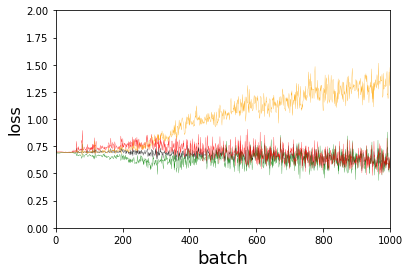

In [10]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 1000)
plt.ylim(0, 2)

plt.show()

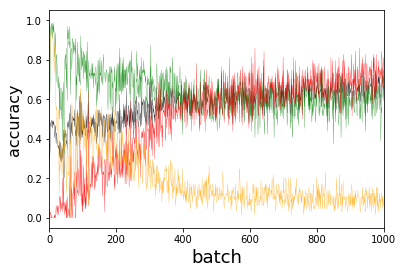

In [11]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 1000)

plt.show()

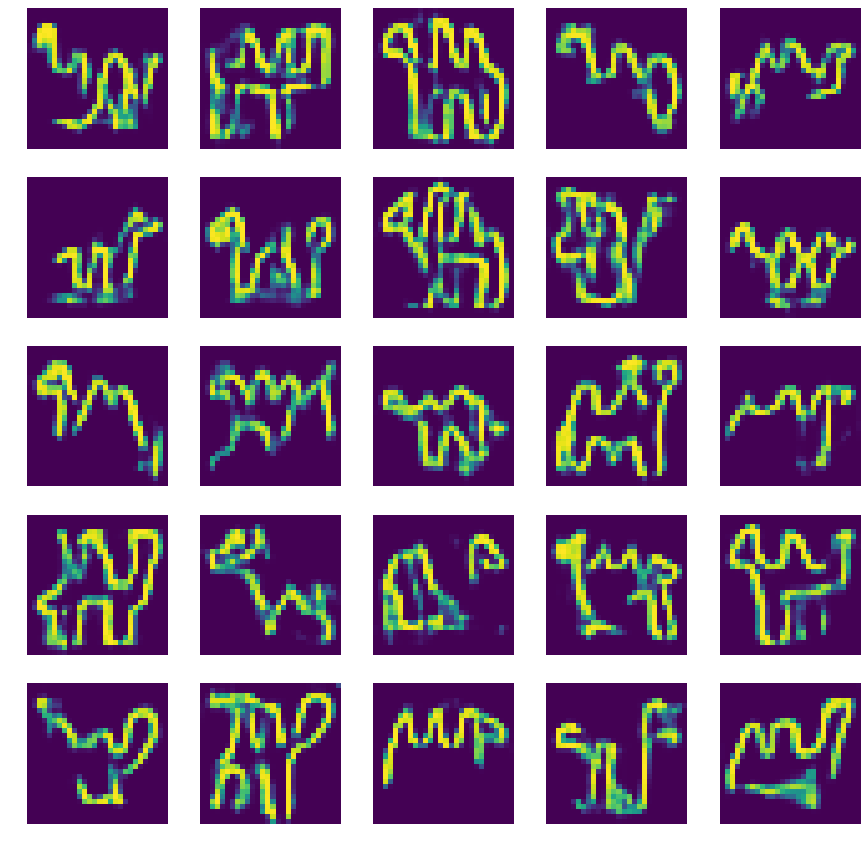

In [14]:
# See some generated images
# See how the generator does after 5 rounds of training.
r, c = 5, 5 # Rows and columns
noise = np.random.normal(0,1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

# What are these two lines for?
gen_imgs = 0.5 * (gen_imgs + 1)
gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize = (15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]))
        axs[i,j].axis('off')
        cnt += 1